In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Parameters

In [7]:
reduced = True
dataset_to_fit = 'html_data'
if dataset_to_fit == 'html_data':
    device = 'iphone'
data_type = 'sit'
data_fit_num = 1

dataset_source_type = 'sit_5'
dataset_source_num = 1

# Load Data

### Original Data

In [8]:
data_source_url = '../data/dataset'
if reduced:
    data_source_url += '_reduced'

data_source = pd.read_csv(data_source_url + '/' + dataset_source_type + '/sub_{}'.format(dataset_source_num) + '.csv')
data_source = data_source.drop('Unnamed: 0', axis=1) if 'Unnamed: 0' in data_source.columns else None
data_source

,gravity.x,gravity.y,gravity.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.314588,0.404381,-0.858784,0.000094,0.000252,-0.006954
1,0.314649,0.404445,-0.858732,-0.001309,0.002262,-0.010348
2,0.314567,0.404560,-0.858708,-0.002174,0.000012,-0.006664
3,0.314286,0.404740,-0.858726,0.001693,0.009216,-0.011575
4,0.314271,0.404894,-0.858658,0.005767,0.007490,-0.008926
...,...,...,...,...,...,...
10287,0.344357,0.358687,-0.867619,0.000004,0.007707,-0.003506
10288,0.343920,0.359324,-0.867528,-0.002688,0.006063,0.003011
10289,0.343255,0.360411,-0.867341,0.001548,0.019090,-0.007339
10290,0.342652,0.360835,-0.867403,0.004180,0.016942,-0.019789


### Data to Fit

In [13]:
data_to_fit_url = '../data/' + dataset_to_fit
if reduced:
    data_to_fit_url += '_reduced'

if dataset_to_fit == 'android_data_latest':
    data_to_fit = pd.read_csv(data_to_fit_url + '/' + data_type + '/{}{}'.format(data_type, data_fit_num) + '-SensorData.csv')
    data_to_fit = data_to_fit.drop('Unnamed: 0', axis=1) if 'Unnamed: 0' in data_to_fit.columns else None

if dataset_to_fit == 'html_data':
    data_to_fit = pd.read_csv(data_to_fit_url + '/' + device + '/' + data_type + '/{}_{}'.format(data_type, data_fit_num) + '.csv')
    data_to_fit = data_to_fit.drop('Unnamed: 0', axis=1) if 'Unnamed: 0' in data_to_fit.columns else None

data_to_fit

,Gravity X,Gravity Y,Gravity Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,-6.28,-2.72,-6.30,0.00,0.32,0.60
1,-6.45,-2.97,-6.45,-0.16,0.10,0.42
2,-6.28,-2.97,-6.72,0.01,0.15,0.12
3,-6.36,-3.19,-7.45,-0.02,-0.04,-0.67
4,-6.70,-4.13,-7.57,-0.29,-0.95,-0.87
...,...,...,...,...,...,...
2096,-1.45,-5.70,-7.76,-0.06,0.15,-0.02
2097,-1.94,-5.75,-7.09,-0.57,0.09,0.67
2098,-1.68,-6.04,-7.58,-0.31,-0.20,0.18
2099,-1.52,-5.91,-7.87,-0.17,-0.09,-0.10


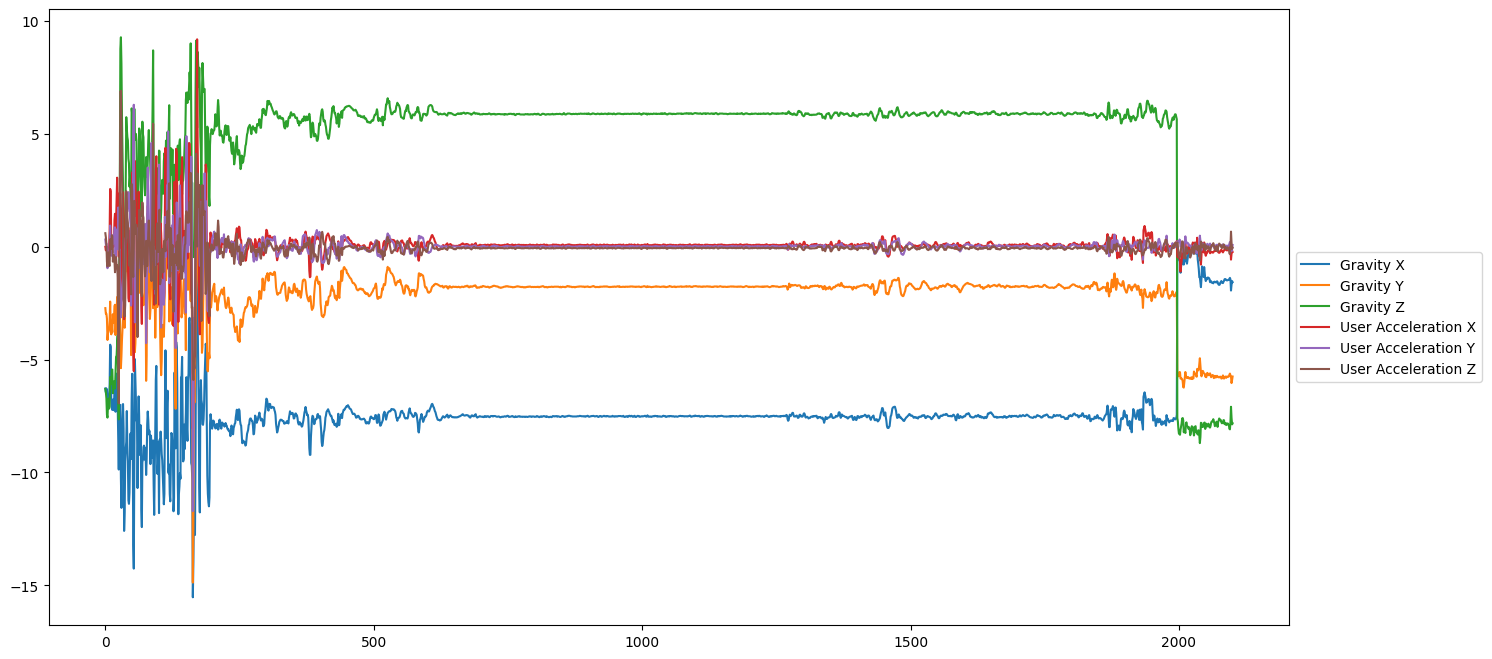

In [14]:
# Plot data
plt.figure(figsize=(16, 8))
plt.plot(data_to_fit)
plt.legend(data_to_fit.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
# Remove Unwanted Data
data_to_fit = data_to_fit.iloc[300:1600]

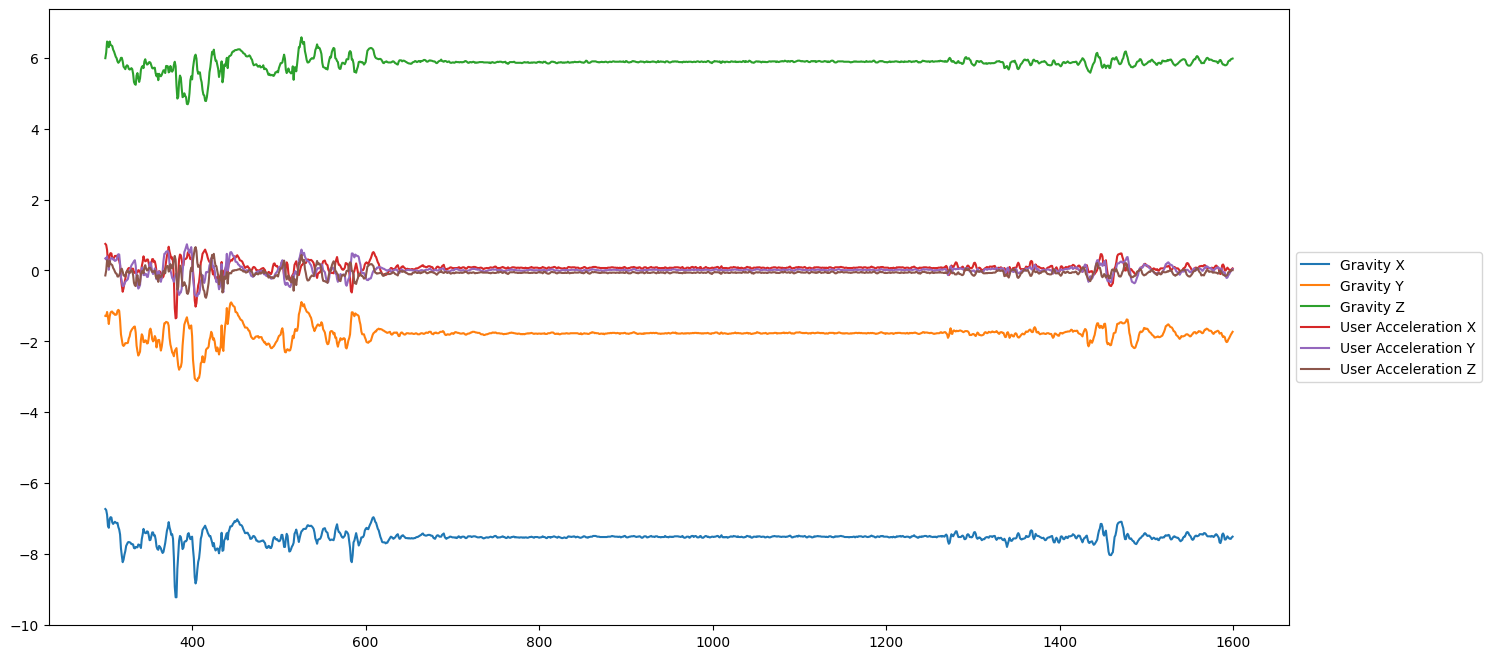

In [16]:
# Plot data
plt.figure(figsize=(16, 8))
plt.plot(data_to_fit)
plt.legend(data_to_fit.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Fit the Length

In [17]:
if len(data_source) >= len(data_to_fit):
    data_source = data_source[:len(data_to_fit)]
else:
    data_to_fit = data_to_fit[:len(data_source)]

print('Data source shape: {}'.format(data_source.shape))
print('Data to fit shape: {}'.format(data_to_fit.shape))

Data source shape: (1300, 6)
Data to fit shape: (1300, 6)


# Calculate Factor with Linear Regression

In [18]:
# find scaling factor of each column wuth linear regression (fit android data to original data)
def calculate_scaling_factors(df, df_o):
    scaling_factors = {}

    for i in range(len(df.columns)):
        X = df.iloc[:, i].values.reshape(-1, 1)
        y = df_o.iloc[:, i].values.reshape(-1, 1)

        model = LinearRegression(fit_intercept=False)
        model.fit(X, y)
        scaling_factors[df.columns[i]] = model.coef_[0][0]

    return scaling_factors

In [19]:
# predict
scaling_factors = calculate_scaling_factors(data_to_fit, data_source)
scaling_factors

{'Gravity X': -0.029265712404529493,
 'Gravity Y': -0.22722004698950246,
 'Gravity Z': -0.15057012495325492,
 'User Acceleration X': 0.005179955652958614,
 'User Acceleration Y': 0.0062933435697516815,
 'User Acceleration Z': 0.03198073759345864}

# Save Scaling Factors

In [20]:
# Write to Constants File
constant_file_url = '../constants.txt'
if reduced:
    constant_file_url = '../constants_reduced.txt'

with open(constant_file_url, 'a') as f:
    f.write(str(scaling_factors) + '\n')

In [21]:
# opening scaling factor file to read the dictionary
factors = []
with open(constant_file_url, 'r') as f:
    lines = f.readlines()
    for line in lines:
        factors.append(eval(line))

factors

[{'Gravity X': -0.029265712404529493,
  'Gravity Y': -0.22722004698950246,
  'Gravity Z': -0.15057012495325492,
  'User Acceleration X': 0.005179955652958614,
  'User Acceleration Y': 0.0062933435697516815,
  'User Acceleration Z': 0.03198073759345864}]